<a href="https://colab.research.google.com/github/Fariha-Anika/Retail-Sales-Analysis-and-Forecasting-Dashboard/blob/main/data_cleaning_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_name = "supermarket_sales - Sheet1"  # Replace with your actual file name
data = pd.read_csv(file_name)


FileNotFoundError: [Errno 2] No such file or directory: 'supermarket_sales - Sheet1'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1 (1).csv


In [ ]:
import pandas as pd

file_name = "supermarket_sales - Sheet1"
data = pd.read_csv(file_name)

FileNotFoundError: [Errno 2] No such file or directory: 'supermarket_sales - Sheet1'

In [ ]:
file_name = "supermarket_sales - Sheet1 (1).csv"
data = pd.read_csv(file_name)


print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [ ]:

print(data.isnull().sum())


data['Date'] = pd.to_datetime(data['Date'])


data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


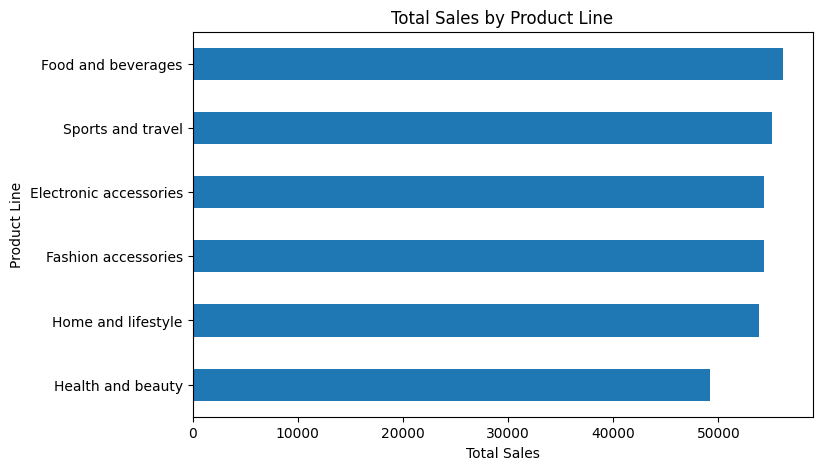

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group sales by product line
sales_by_product = data.groupby('product_line')['total'].sum().sort_values()

# Plot sales by product line
plt.figure(figsize=(8, 5))
sales_by_product.plot(kind='barh', title='Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()


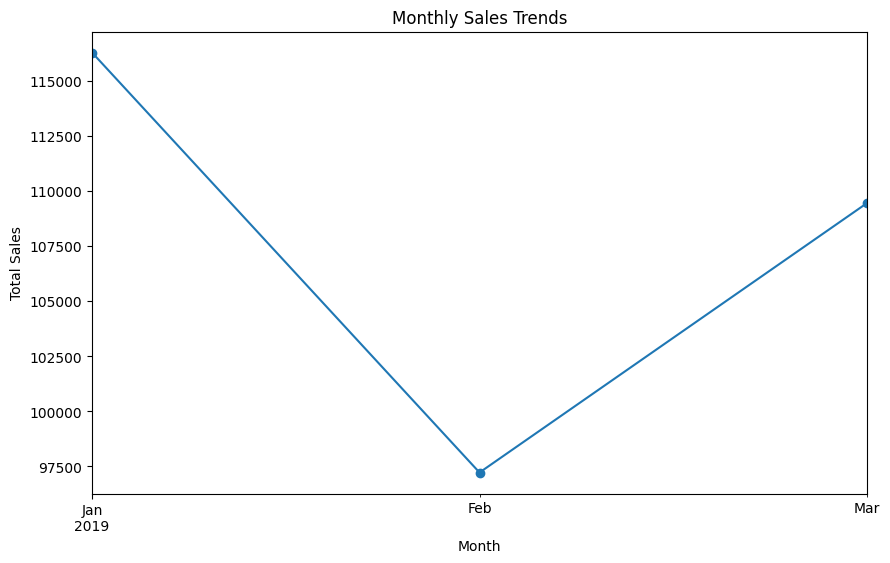

In [ ]:
# Extract the month from the date
data['month'] = data['date'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = data.groupby('month')['total'].sum()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


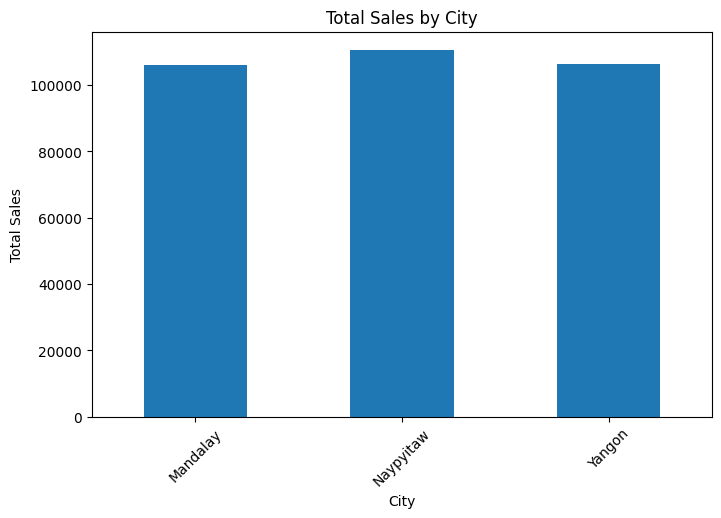

In [ ]:
# Group sales by city
sales_by_city = data.groupby('city')['total'].sum()

# Plot sales by city
plt.figure(figsize=(8, 5))
sales_by_city.plot(kind='bar', title='Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data['profit'] = data['total'] - data['cogs']
data['profit_margin'] = data['profit'] / data['total']



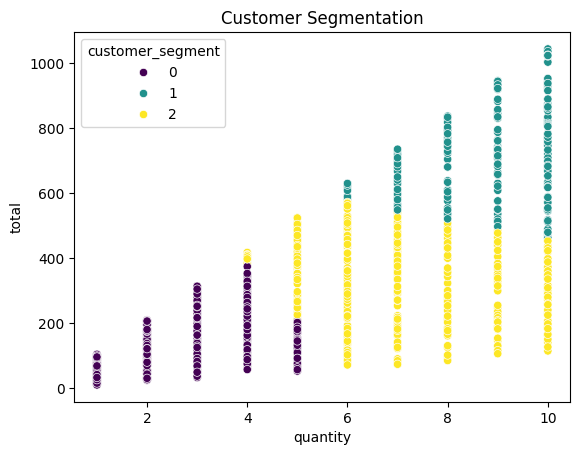

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
cluster_data = scaler.fit_transform(data[['quantity', 'total']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['customer_segment'] = kmeans.fit_predict(cluster_data)

# Visualize clusters
sns.scatterplot(data=data, x='quantity', y='total', hue='customer_segment', palette='viridis')
plt.title('Customer Segmentation')
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kj05eit/gkaya_zi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kj05eit/g2q9el4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48643', 'data', 'file=/tmp/tmp2kj05eit/gkaya_zi.json', 'init=/tmp/tmp2kj05eit/g2q9el4u.json', 'output', 'file=/tmp/tmp2kj05eit/prophet_modelan9xjy76/prophet_model-20250107205847.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:58:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:58:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


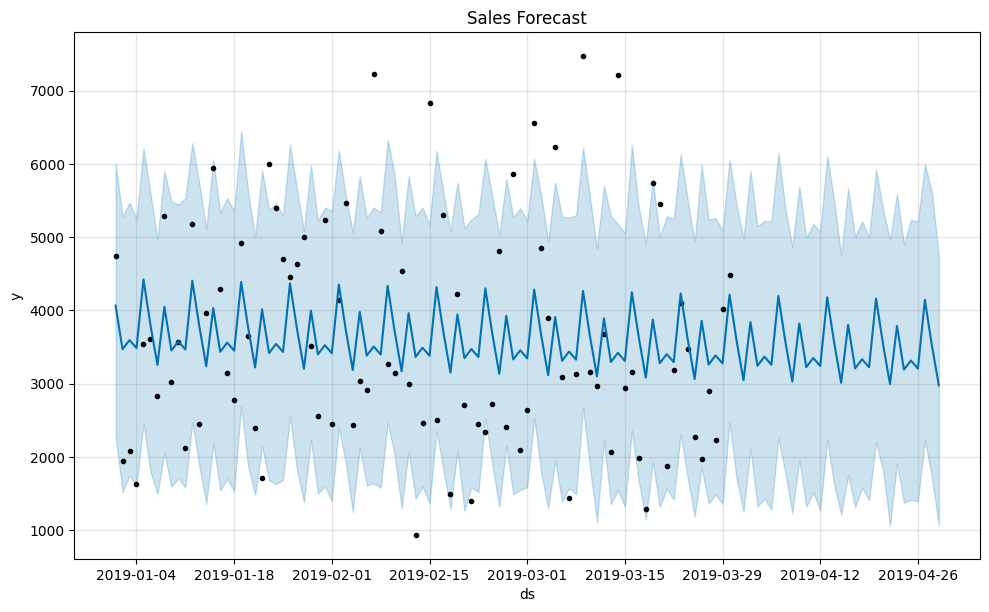

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
forecast_data = data.groupby('date')['total'].sum().reset_index()
forecast_data.columns = ['ds', 'y']  # Rename columns for Prophet

# Initialize and fit model
model = Prophet()
model.fit(forecast_data)

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # Forecast for 30 days
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast')
plt.show()


In [ ]:
data.to_csv('cleaned_supermarket_sales.csv', index=False)


In [ ]:
data.to_csv('cleaned_supermarket_sales.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_supermarket_sales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>